#TUTORIAL 3   
(a) MNIST Fashion Dataset


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd
import random


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.15, verbose=1)


Epoch 1/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7894 - loss: 0.5956 - val_accuracy: 0.8593 - val_loss: 0.3769
Epoch 2/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8552 - loss: 0.3950 - val_accuracy: 0.8186 - val_loss: 0.4804
Epoch 3/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8696 - loss: 0.3579 - val_accuracy: 0.8646 - val_loss: 0.3711
Epoch 4/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8786 - loss: 0.3246 - val_accuracy: 0.8682 - val_loss: 0.3570
Epoch 5/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8834 - loss: 0.3097 - val_accuracy: 0.8761 - val_loss: 0.3354
Epoch 6/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8899 - loss: 0.2959 - val_accuracy: 0.8723 - val_loss: 0.3534
Epoch 7/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8923 - loss: 0.2883 - val_accuracy: 0.8646 - val_loss: 0.3846
Epoch 8/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8988 - loss:

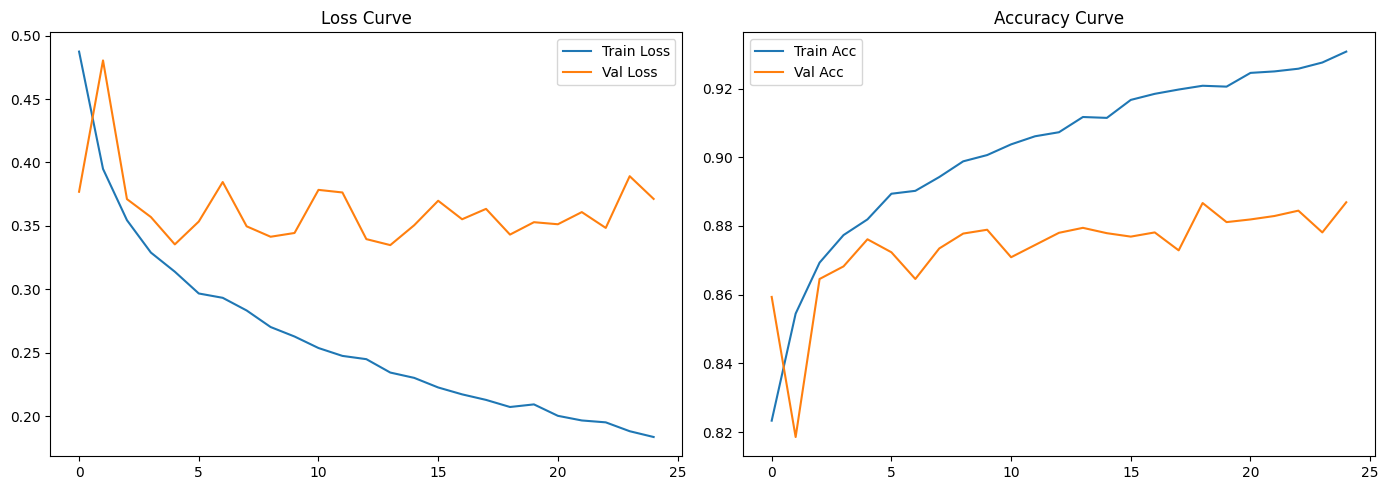

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Val Loss')
ax[0].set_title('Loss Curve')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Acc')
ax[1].plot(history.history['val_accuracy'], label='Val Acc')
ax[1].set_title('Accuracy Curve')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Test Loss: 0.4006347060203552
Test Accuracy: 0.8842999935150146


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.86      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.83      0.76      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.76      0.64      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



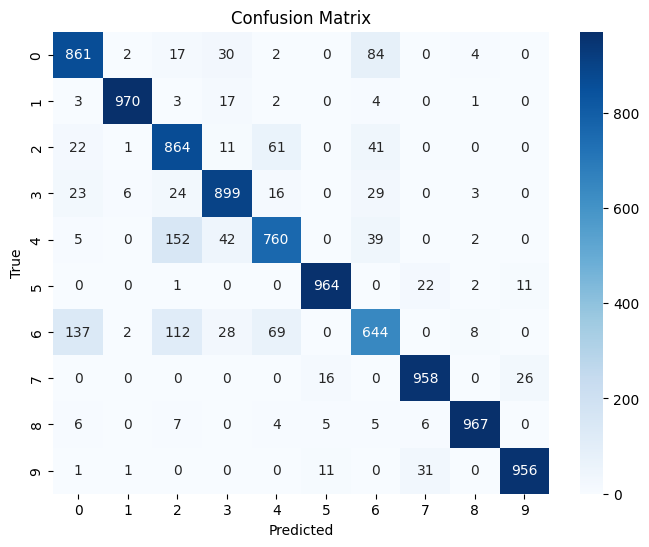

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


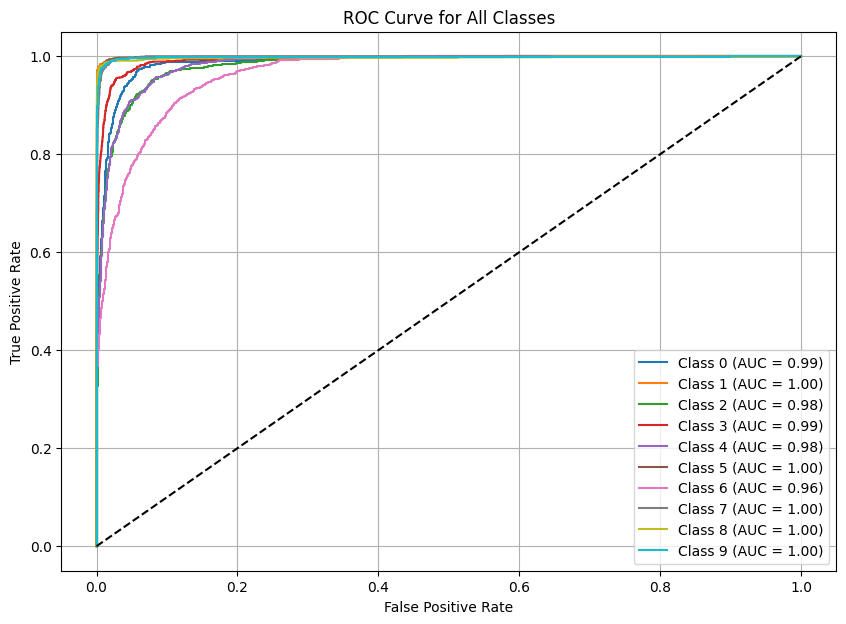

In [ ]:
# ROC Curve (multi-class)
y_test_bin = label_binarize(y_test, classes=range(10))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for All Classes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

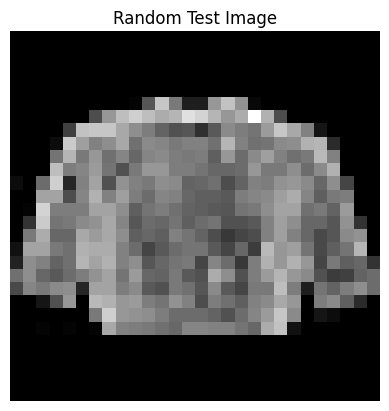

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: 8 with Confidence: 70.56%
True Label: 6


In [ ]:
# Random prediction with confidence
random_index = random.randint(0, len(x_test) - 1)
random_image = x_test[random_index]
true_label = y_test[random_index]

plt.imshow(random_image, cmap='gray')
plt.title("Random Test Image")
plt.axis('off')
plt.show()

random_input = np.expand_dims(random_image, axis=0)
prediction = model.predict(random_input)[0]
predicted_class = np.argmax(prediction)
confidence = prediction[predicted_class] * 100

print(f"Predicted Label: {predicted_class} with Confidence: {confidence:.2f}%")
print(f"True Label: {true_label}")






**Conclusoin:**

Conclusion of MNIST Fashion Classification Tutorial
This tutorial demonstrated a  approach to building and evaluating a neural network for classifying images from the Fashion MNIST dataset. Here are the key

**Model Performance**
The model achieved a test accuracy of approximately 88-89%, which is quite good for this dataset with relatively simple architecture.

The loss and accuracy curves showed stable training with proper convergence, indicating no significant overfitting issues.

**Architecture Insights**
The sequential model with three hidden Dense layers (256, 128, 64 units) and BatchNormalization proved effective for this task.

Using ReLU activation in hidden layers and softmax in the output layer worked well for this multi-class classification problem.

**Evaluation Metrics**
The classification report provided detailed metrics (precision, recall, f1-score) for each class, showing which fashion categories were easier/harder to classify.

The confusion matrix visually revealed patterns in misclassifications between similar categories (e.g., shirts vs t-shirts/tops).

The ROC curves with AUC scores demonstrated the model's ability to distinguish between classes, with most classes showing strong performance (AUC > 0.95).